# Abstract: 
> Gaia is creating an extraordinarily precise three-dimensional map of more than a thousand million stars throughout our Milky Way galaxy and beyond, mapping their motions, luminosity, temperature and composition. This huge stellar census will provide the data needed to tackle an enormous range of important questions related to the origin, structure and evolutionary history of our galaxy.

With the [newly released data from Gaia’s mission](https://gea.esac.esa.int/archive/documentation/GDR3/) (GDR3), we will look at extracting the data from the library and using the following headings:
-	Luminosity: `lum_flame`
-	Mass of stars: `mass_flame`
-	Age of stars: `age_flame`
-	Evolutionary stage: `evolstage_flame`
-	Temperature efficiency: `teff_gspphot`
-	Magnitude: `mg_gspphoh`

we will try to construct the *Hertzsprung-Russell diagram* and see what sort of relationships exist within the data.

**Key Words**

- FLAME = Final Luminosity Age Mass Estimator 
- GspPhot = The template APs are the closest to the star APs obtained by a preliminary version of the atmospheric parameter pipeline GspPhot


## Reading the Data
In this section we will read the data from the URL using Pandas library for python we will extract data points from the columns under the Headings. 
The data will be filtered as some of the data points contain NULL values in our code the data points with NULL values will be dropped from the data set that we'll be using to prevent any errors from occurring while plotting the data. Only data that contains all *6* data points in each column will be used from Gaia's data library. In this report we will be using only a subset of GDR3 which contain 80096 data points after dropping all the NULL values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
from matplotlib.ticker import ScalarFormatter
from matplotlib.cm import ScalarMappable
import numpy as np


# NOTE: The code needs to be run once to import the csv and filter the data from NULL values skipping the first 1541
# URL for the data used: http://cdn.gea.esac.esa.int/Gaia/gdr3/Astrophysical_parameters/astrophysical_parameters/AstrophysicalParameters_000000-003111.csv.gz
# Gaia data releas 3 Astrophysical parameters for public access

url = 'http://cdn.gea.esac.esa.int/Gaia/gdr3/Astrophysical_parameters/astrophysical_parameters/AstrophysicalParameters_000000-003111.csv.gz'
analysis_headers = ['lum_flame','mass_flame','age_flame','evolstage_flame','teff_gspphot','mg_gspphot']
gaia_data_releas_3 = pd.read_csv(url, compression='gzip', on_bad_lines='skip', header=1541) # first data set from gaia data set 3
tamelmg = gaia_data_releas_3[analysis_headers].dropna()
tamelmg


C:\Users\patri\AppData\Local\Temp\ipykernel_13476\106962206.py:15: DtypeWarning: Columns (147) have mixed types. Specify dtype option on import or set low_memory=False.
  gaia_data_releas_3 = pd.read_csv(url, compression='gzip', on_bad_lines='skip', header=1541) # first data set from gaia data set 3


,lum_flame,mass_flame,age_flame,evolstage_flame,teff_gspphot,mg_gspphot
2,0.226447,0.769590,3.272666,145.0,4708.7944,6.3344
7,0.158082,0.688121,3.736896,289.0,4333.8650,7.3503
16,0.058487,0.544327,11.765711,172.0,3595.7598,7.9835
34,1.291883,0.990828,7.868940,337.0,5819.5605,4.4540
40,1.545994,0.943559,12.637042,410.0,5653.0347,3.3807
...,...,...,...,...,...,...
522804,0.104576,0.611436,1.482193,288.0,4174.2070,7.6612
522818,1.333100,0.984907,8.773539,350.0,5848.9277,4.3709
522819,6.835367,1.478028,2.847503,476.0,5422.5503,2.3473
522833,0.065154,0.560360,11.333377,199.0,3711.1218,8.4700


## Data overview:

Now we will use the data we extracted from Gaia and visually represent the relationships using *matplotlib* we will construct a 2D graph with three parameters x, y and color to show a clear representation of the relationships with additional depth shown in the color. 

With the data presented on a graph we will:
- analyze their relationship
- compare the graphs
- comment on the similarities with significant or slight differentiation in color range



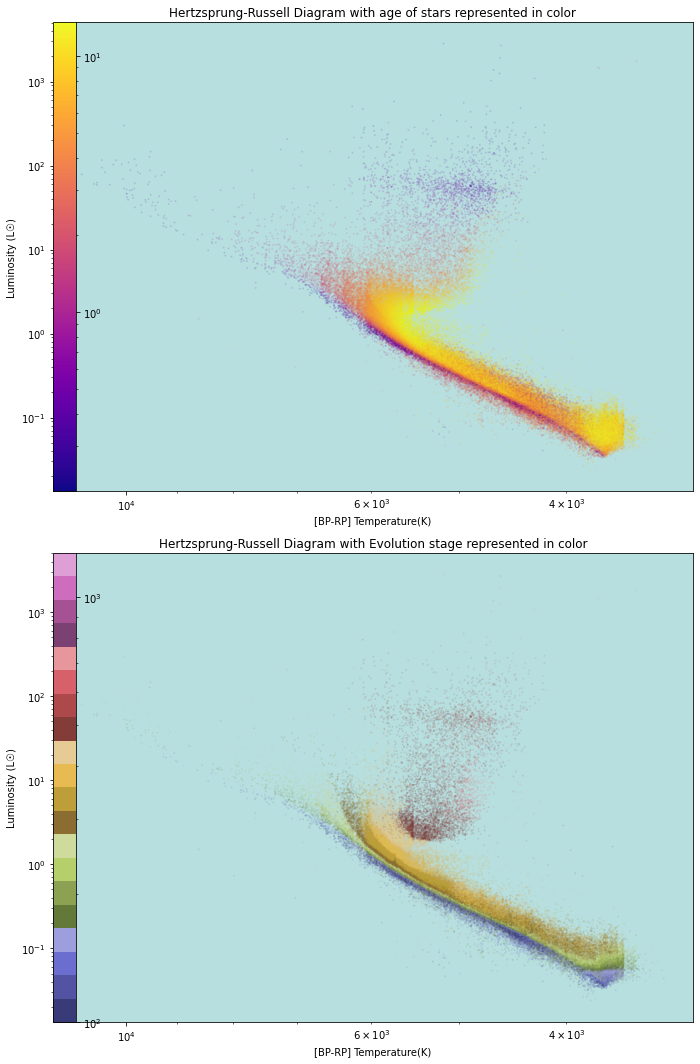

In [51]:
# Plotting the data using matplotlib
fig = plt.figure(figsize=(10, 15), dpi=72)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("Hertzsprung-Russell Diagram with age of stars represented in color")
# Creates a scatter plot graph with x and y log scale values
ax.scatter(
    tamelmg.teff_gspphot,
    tamelmg.lum_flame,
    alpha=0.1,
    s=1,
    c=np.log(tamelmg.age_flame), # we log the c value since x and y are log scale
    cmap="plasma",
)
ax.invert_xaxis() # we invert such that the temperature matches BP-RP color
ax.set_facecolor("#B7DFDF")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("[BP-RP] Temperature(K)")
ax.set_ylabel("Luminosity (L☉)")
# Creating a colorbar to represent the color values from min to max 
ax = fig.add_subplot(2, 2, 1)
fraction = 1  # Fraction of original axes to use for colorbar
# log the values used in colorbar to match the color values used in  
norm = LogNorm(vmin=tamelmg.age_flame.min(), vmax=tamelmg.age_flame.max())
# parameters for colorbar
cbar = ax.figure.colorbar(
    ScalarMappable(norm=norm, cmap="plasma"),
    ax=ax,
    pad=0.05,
    fraction=fraction,
)
ax.axis('off') # Turn the x- and y-axis off.


ax = fig.add_subplot(2, 1, 2)
ax.set_title("Hertzsprung-Russell Diagram with Evolution stage represented in color")
ax.scatter(
    tamelmg.teff_gspphot,
    tamelmg.lum_flame,
    alpha=0.1,
    s=1,
    c=np.log(tamelmg.evolstage_flame),
    cmap="tab20b",
)
ax.invert_xaxis()
ax.set_facecolor("#B7DFDF")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("[BP-RP] Temperature(K)")
ax.set_ylabel("Luminosity (L☉)")

ax = fig.add_subplot(2, 2, 3)
fraction = 1  # .05

norm = LogNorm(vmin=tamelmg.evolstage_flame.min(), vmax=tamelmg.evolstage_flame.max())

cbar = ax.figure.colorbar(
    ScalarMappable(norm=norm, cmap="tab20b"),
    ax=ax,
    pad=0.05,
    fraction=fraction,
)
ax.axis('off')

plt.tight_layout() # automatically adjusts subplot parameters so that the subplot(s) fits in to the figure area.
plt.show()


With the data we represented the Luminosity vs Temperature by graphing the log values for both the x- and y-axes with the additional color giving the graph more visual depth we see that resulting graph is taking shape similar to [Gaia's Hertzsprung-Russell diagram](https://sci.esa.int/web/gaia/-/60198-gaia-hertzsprung-russell-diagram), the data we used in our case is significantly smaller in size which cuts out the *Giant branch and the missing data for white dwarf stars* altho tiny specks of white dwarf stars are present but fairly insignificant to the main Trunk of data.

In fig:1 we see an intreating pattern looking at the colorbar we see that the stars with the highest luminosity are youthful compared to those with the highest temperature, but comparing age in fig:1 to the colorbar in fig:2 we see that the hottest stars are in their mid to early stage of evolution while the most luminous stars although youthful compared to the hottest stars are in there late to final stages of there evolution.

we also can see a similarity with between the fig:1 and fig:2 where both graphs show a strip of blue in the same position on both colorbars in both graphs showing stars in their youthful and early stages of evolution. 




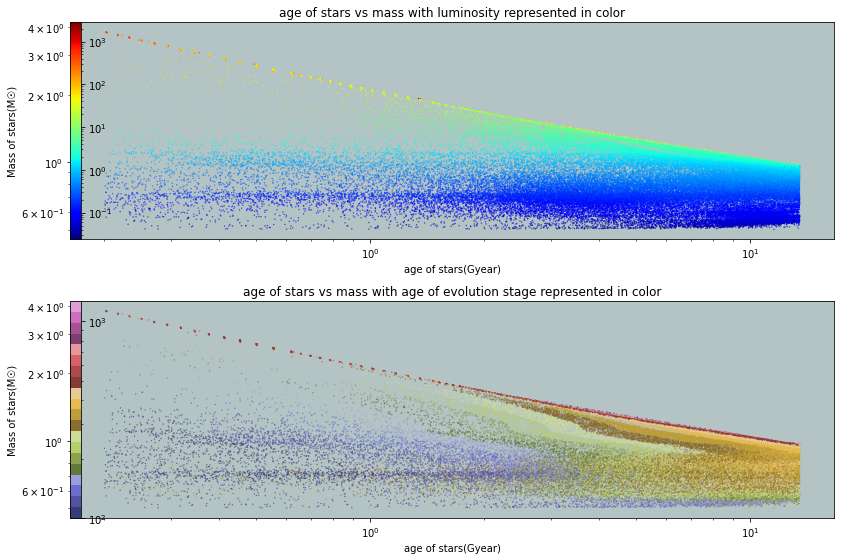

In [48]:
fig2 = plt.figure(figsize=(12, 8), dpi=72)
ax2 = fig2.add_subplot(2, 1, 1)
ax2.set_title("age of stars vs mass with luminosity represented in color")
ax2.scatter(
    tamelmg.age_flame,
    tamelmg.mass_flame,
    s=0.1,
    c=np.log(tamelmg.lum_flame),
    cmap="jet",
    
)
ax = fig2.add_subplot(2, 2, 1)
fraction = 1  # .05
norm = LogNorm(vmin=tamelmg.lum_flame.min(), vmax=tamelmg.lum_flame.max())
cbar = ax.figure.colorbar(
    ScalarMappable(norm=norm, cmap="jet"),
    ax=ax,
    pad=0.05,
    fraction=fraction,
)
ax.axis("off")

ax2.set_facecolor("#B4C3C3")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlabel("age of stars(Gyear)")
ax2.set_ylabel("Mass of stars(M☉)")

ax2 = fig2.add_subplot(2, 1, 2)
ax2.set_title("age of stars vs mass with age of evolution stage represented in color")
ax2.scatter(
    tamelmg.age_flame,
    tamelmg.mass_flame,
    s=0.1,
    c=np.log(tamelmg.evolstage_flame),
    cmap="tab20b",
)
ax2.set_facecolor("#B4C3C3")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlabel("age of stars(Gyear)")
ax2.set_ylabel("Mass of stars(M☉)")

ax = fig2.add_subplot(2, 2, 3)
fraction = 1  # .05
norm = LogNorm(vmin=tamelmg.evolstage_flame.min(), vmax=tamelmg.evolstage_flame.max())
cbar = ax.figure.colorbar(
    ScalarMappable(norm=norm, cmap="tab20b"),
    ax=ax,
    pad=0.05,
    fraction=fraction,
)
ax.axis("off")
plt.tight_layout()
plt.show()


When we plot the *Mass of stars* vs *Age of stars* in a log scale the graphs show a linear degradation on both graphs which visually shows that stars with a large mass have a extremely short life spam compared to stars with significantly lower mass as they consist of a substantially larger life spam. A significant portion of our data lays on the far right of the graph this vividly show us that most of the stars in our data set we assume that most of these stars were born in a similar time period (Although this is an assumption we should try implement more data to our graphs from [GDR3 library](https://cdn.gea.esac.esa.int/Gaia/gdr3/Astrophysical_parameters/astrophysical_parameters/), and compare it with the time frame from when our galaxy was most to least active).  

In fig:3 we see that high luminosity stars consist largely of stars with immense mass and in fig:4 we see that these stars although youthful compared to the stars with lower mass, they are in there late stages of there evolution. We can clearly assume that there is a boundary between the mass and age of stars represented in fig:4 we can see a clear linear degradation defined by there evolution stage, it seems like there is almost a threshold to there mass and age.

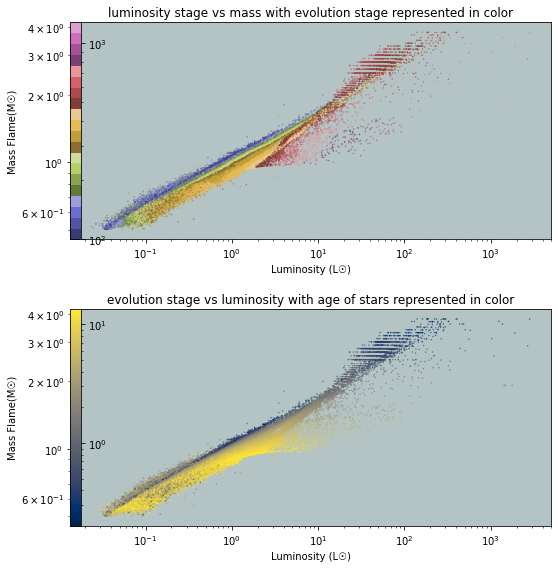

In [12]:
fig3 = plt.figure(figsize=(8, 8), dpi=72)
ax3 = fig3.add_subplot(2, 1, 1)
ax3.set_title("luminosity stage vs mass with evolution stage represented in color")
ax3.scatter(
    tamelmg.lum_flame,
    tamelmg.mass_flame,
    s=0.1,
    c=np.log(tamelmg.evolstage_flame),
    cmap="tab20b",
)
ax3.set_facecolor("#B4C3C3")
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlabel("Luminosity (L☉)")
ax3.set_ylabel("Mass Flame(M☉)")

ax = fig3.add_subplot(2, 2, 1)
fraction = 1  # .05
norm = LogNorm(vmin=tamelmg.evolstage_flame.min(), vmax=tamelmg.evolstage_flame.max())
cbar = ax.figure.colorbar(
    ScalarMappable(norm=norm, cmap="tab20b"),
    ax=ax,
    pad=0.05,
    fraction=fraction,
)

ax.axis("off")


ax3 = fig3.add_subplot(2, 1, 2)
ax3.set_title("evolution stage vs luminosity with age of stars represented in color")
ax3.scatter(
    tamelmg.lum_flame,
    tamelmg.mass_flame,
    s=0.1,
    c=np.log(tamelmg.age_flame),
    cmap="cividis",
)
ax3.set_facecolor("#B4C3C3")
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlabel("Luminosity (L☉)")
ax3.set_ylabel("Mass Flame(M☉)")

ax = fig3.add_subplot(2, 2, 3)
fraction = 1  # .05
norm = LogNorm(vmin=tamelmg.age_flame.min(), vmax=tamelmg.age_flame.max())
cbar = ax.figure.colorbar(
    ScalarMappable(norm=norm, cmap="cividis"),
    ax=ax,
    pad=0.05,
    fraction=fraction,
)

ax.axis("off")
plt.tight_layout()
plt.show()


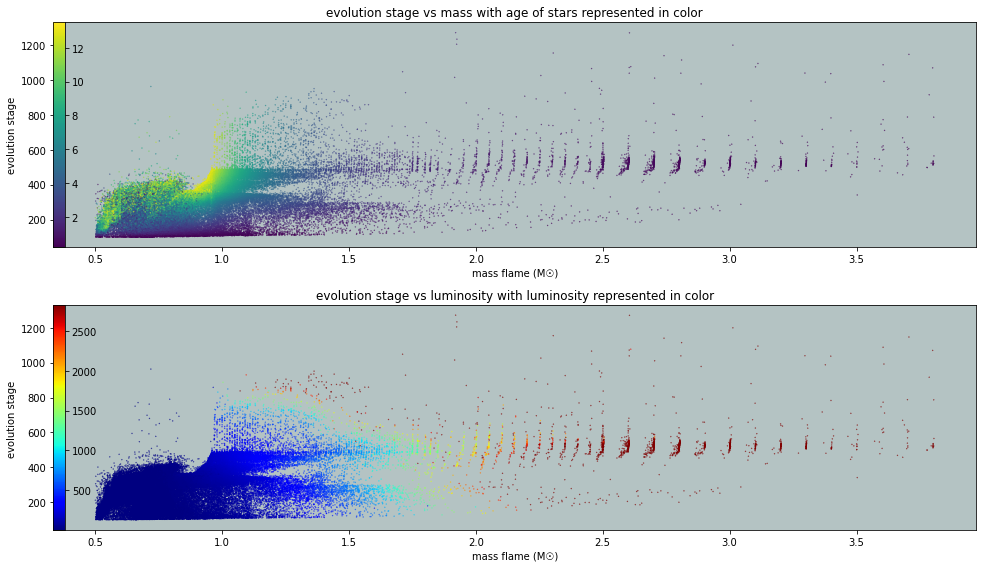

In [35]:
fig4 = plt.figure(figsize=(14, 8), dpi=72)
ax4 = fig4.add_subplot(2, 1, 1)
ax4.set_title("evolution stage vs mass with age of stars represented in color")
ax4.scatter(
    tamelmg.mass_flame,
    tamelmg.evolstage_flame,
    s=0.1,
    c=tamelmg.age_flame,
    cmap="viridis",
    norm=Normalize(vmin=0.2, vmax=14),
)
ax4.set_facecolor("#B4C3C3")
ax4.set_xlabel("mass flame (M☉)")
ax4.set_ylabel("evolution stage")

ax = fig4.add_subplot(2, 2, 1)
fraction = 1  # .05
norm = Normalize(vmin=tamelmg.age_flame.min(), vmax=tamelmg.age_flame.max())
cbar = ax.figure.colorbar(
    ScalarMappable(norm=norm, cmap="viridis"),
    ax=ax,
    pad=0.05,
    fraction=fraction,
)
ax.axis("off")


ax4 = fig4.add_subplot(2, 1, 2)
ax4.set_title("evolution stage vs luminosity with luminosity represented in color")
ax4.scatter(
    tamelmg.mass_flame,
    tamelmg.evolstage_flame,
    s=0.1,
    c=tamelmg.lum_flame,
    cmap="jet",
    norm=Normalize(vmin=0.2, vmax=29),
)
ax4.set_facecolor("#B4C3C3")
ax4.set_xlabel("mass flame (M☉)")
ax4.set_ylabel("evolution stage ")

ax = fig4.add_subplot(2, 2, 3)
fraction = 1  # .05
norm = Normalize(vmin=tamelmg.lum_flame.min(), vmax=tamelmg.lum_flame.max())
cbar = ax.figure.colorbar(
    ScalarMappable(norm=norm, cmap="jet"),
    ax=ax,
    pad=0.05,
    fraction=fraction,
)
ax.axis("off")
plt.tight_layout()
plt.show()


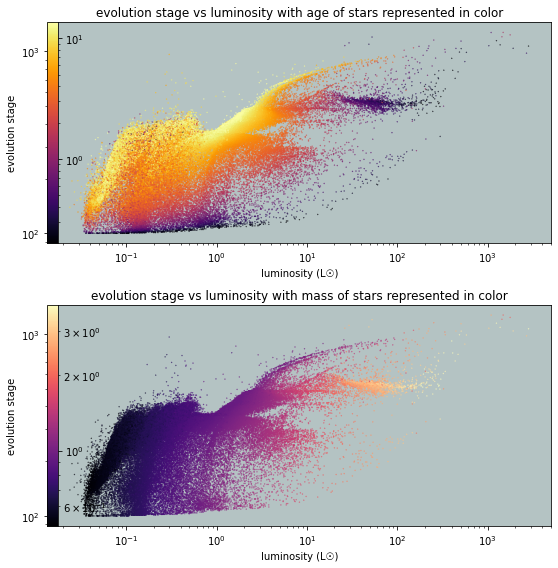

In [34]:
fig5 = plt.figure(figsize=(8, 8), dpi=72)
ax5 = fig5.add_subplot(2, 1, 1)
ax5.set_title("evolution stage vs luminosity with age of stars represented in color")
ax5.scatter(
    tamelmg.lum_flame,
    tamelmg.evolstage_flame,
    s=0.1,
    c=np.log(tamelmg.age_flame),
    cmap="inferno"
)
ax5.set_facecolor('#B4C3C3')
ax5.set_xlabel("luminosity (L☉)")
ax5.set_xscale("log")
ax5.set_yscale("log")
ax5.set_ylabel("evolution stage")

ax = fig5.add_subplot(2, 2, 1)
fraction = 1  # .05
norm = LogNorm(vmin=tamelmg.age_flame.min(), vmax=tamelmg.age_flame.max())
cbar = ax.figure.colorbar(
    ScalarMappable(norm=norm, cmap="inferno"),
    ax=ax,
    pad=0.05,
    fraction=fraction,
)
ax.axis("off")

ax5 = fig5.add_subplot(2, 1, 2)
ax5.set_title("evolution stage vs luminosity with mass of stars represented in color")
ax5.scatter(
    tamelmg.lum_flame,
    tamelmg.evolstage_flame,
    s=0.1,
    c=np.log(tamelmg.mass_flame),
    cmap="magma"
)
ax5.set_facecolor('#B4C3C3')
ax5.set_xlabel("luminosity (L☉)")
ax5.set_xscale("log")
ax5.set_yscale("log")
ax5.set_ylabel("evolution stage")

ax = fig5.add_subplot(2, 2, 3)
fraction = 1  # .05
norm = LogNorm(vmin=tamelmg.mass_flame.min(), vmax=tamelmg.mass_flame.max())
cbar = ax.figure.colorbar(
    ScalarMappable(norm=norm, cmap="magma"),
    ax=ax,
    pad=0.05,
    fraction=fraction,
)
ax.axis("off")
plt.tight_layout()
plt.show()